In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 9: Pre-processing

Last update: Feb 6, 2019

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2019-02-07 14:35:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: `wine.data'

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0.01s   

2019-02-07 14:35:08 (843 KB/s) - `wine.data' saved [10782/10782]



In [3]:
df = pd.read_table('wine.data', header=None, sep=',', names=[
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'])

In [4]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


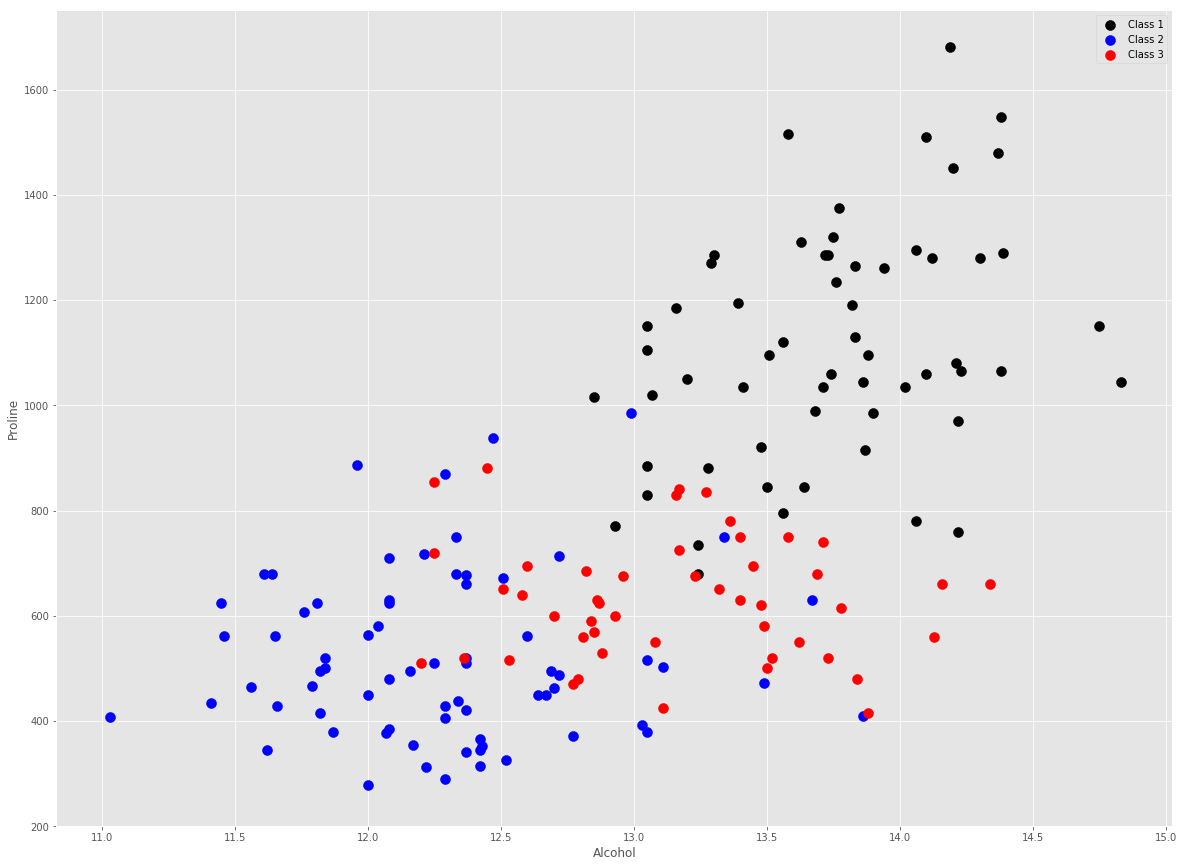

In [5]:
def plot(x,y):
    fig = plt.figure(figsize=(20,15))
    ax = fig.gca()
    df[df['Class'] == 1].plot(ax=ax, x=x, y=y, c='black', label='Class 1', s=100, kind='scatter')
    df[df['Class'] == 2].plot(ax=ax, x=x, y=y, c='blue', label='Class 2', s=100, kind='scatter')
    df[df['Class'] == 3].plot(ax=ax, x=x, y=y, c='red', label='Class 3', s=100, kind='scatter')
    
plot('Alcohol', 'Proline')

In [6]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
corr = df.corr()

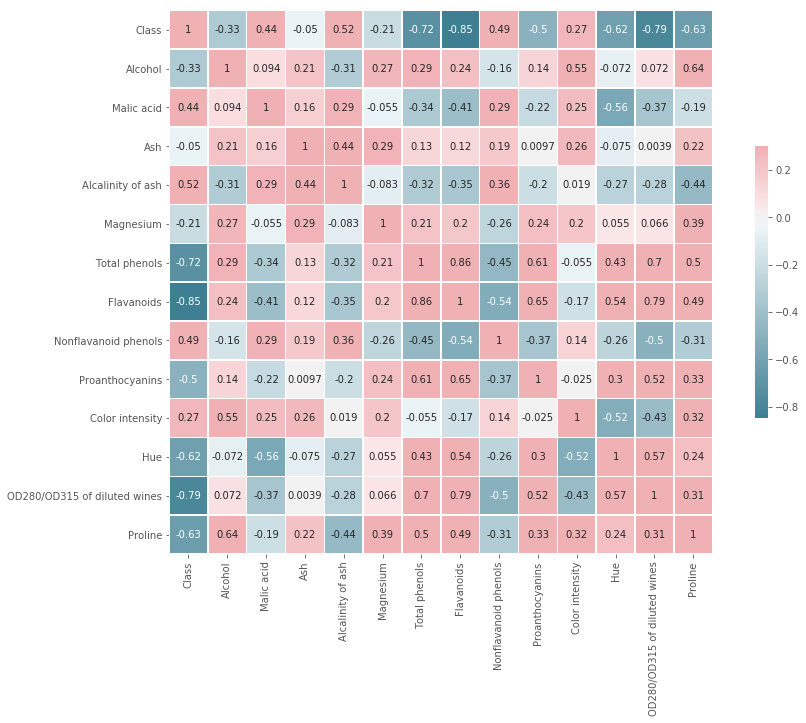

In [8]:
import seaborn as sns

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

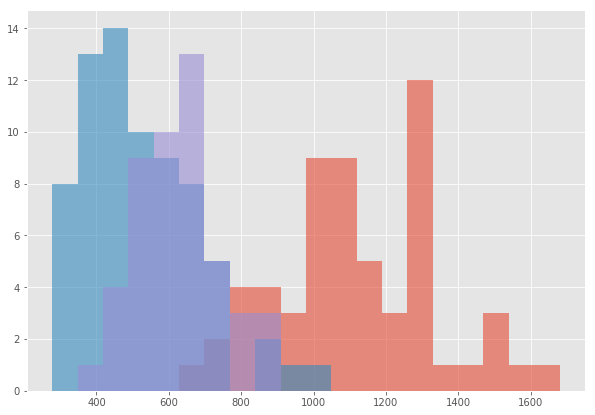

In [9]:
def hist(x, bins=20):
    working_range = (min(df[x]), max(df[x]))
    ax = df[df['Class'] == 1][x].hist(bins=bins,range=working_range,alpha=0.6,figsize=(10,7))
    df[df['Class'] == 2][x].hist(bins=bins,range=working_range,alpha=0.6,ax=ax)
    df[df['Class'] == 3][x].hist(bins=bins,range=working_range,alpha=0.6,ax=ax)

hist('Proline')

0    1065
1    1050
2    1185
3    1480
4     735
Name: Proline, dtype: int64


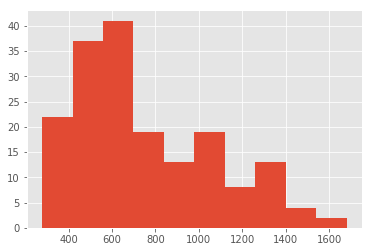

In [10]:
proline = df['Proline']

print(proline.head())
proline.hist()

0    318.106742
1    303.106742
2    438.106742
3    733.106742
4    -11.893258
Name: Proline, dtype: float64


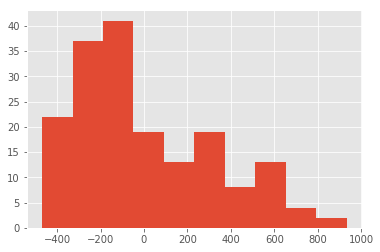

In [11]:
# center around mean
proline = proline - proline.mean() 
print(proline.head())
proline.hist()

Original SD =  314.9074742768491
0    1.010159
1    0.962526
2    1.391224
3    2.328007
4   -0.037767
Name: Proline, dtype: float64
New standard deviation =  1.0


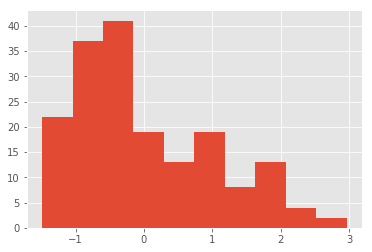

In [12]:
# Standardization: rescale by its SD
# Note: Must to centered at 0 first
print("Original SD = ", proline.std())
normalized_proline = proline / proline.std()
print(normalized_proline.head())
normalized_proline.hist()
print("New standard deviation = ", normalized_proline.std())

0    0.122682
1    0.101284
2    0.293866
3    0.714693
4   -0.348074
Name: Proline, dtype: float64


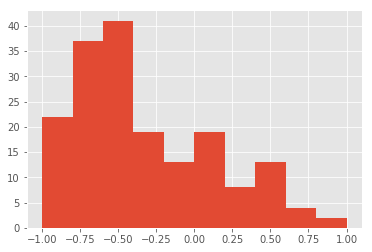

In [13]:
# max-min scale: rescale to -1 and 1
maxmin_proline = (proline - proline.min()) / (proline.max()-proline.min()) # [0..1]
maxmin_proline = (maxmin_proline - 0.5) * 2 # [-1..1]
print(maxmin_proline.head())
maxmin_proline.hist()

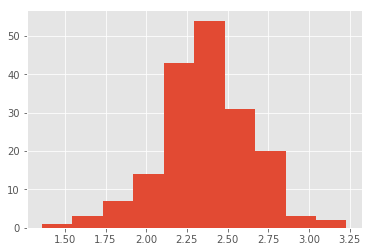

In [14]:
df['Ash'].hist()

In [15]:
from scipy.stats import normaltest

for col in df.columns:
    print(col, normaltest(df[col]))

Class NormaltestResult(statistic=165.3056182304674, pvalue=1.2715723843236191e-36)
Alcohol NormaltestResult(statistic=15.963552699056713, pvalue=0.00034163202531285264)
Malic acid NormaltestResult(statistic=25.32089922839092, pvalue=3.1742168603714762e-06)
Ash NormaltestResult(statistic=6.630992588585367, pvalue=0.03631602067034469)
Alcalinity of ash NormaltestResult(statistic=3.1208885294685937, pvalue=0.21004273588925534)
Magnesium NormaltestResult(statistic=38.368979497452045, pvalue=4.658884716268434e-09)
Total phenols NormaltestResult(statistic=14.990683744930381, pvalue=0.0005556667174637149)
Flavanoids NormaltestResult(statistic=17.94370269186268, pvalue=0.00012693297763919295)
Nonflavanoid phenols NormaltestResult(statistic=11.855325665160745, pvalue=0.0026647025727076653)
Proanthocyanins NormaltestResult(statistic=9.656424113951088, pvalue=0.008000813483971013)
Color intensity NormaltestResult(statistic=19.683101281652828, pvalue=5.319476116400439e-05)
Hue NormaltestResult(sta

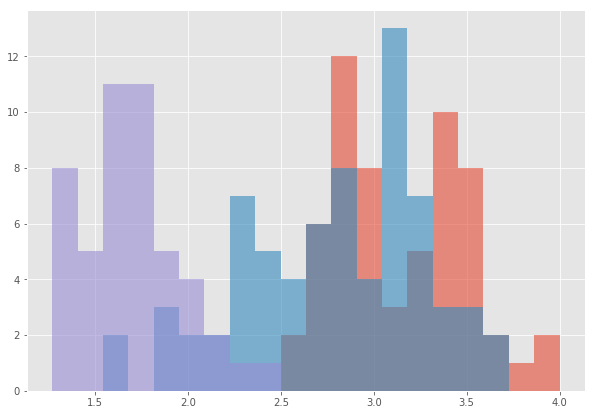

In [16]:
# reject
# conclusion: not normal
hist('OD280/OD315 of diluted wines')

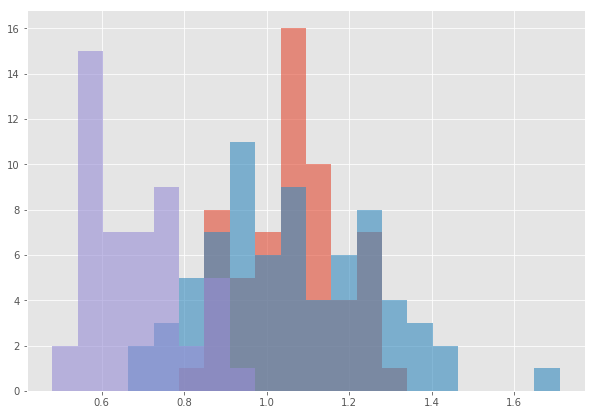

In [17]:
# not reject
# conclusion: unknown
hist('Hue')

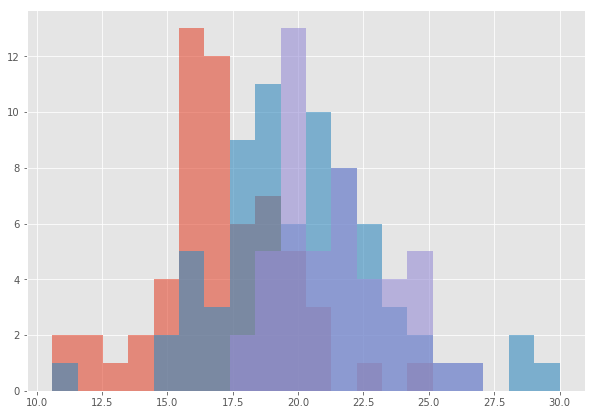

In [18]:
# not reject
# conclusion: unknown
hist('Alcalinity of ash')

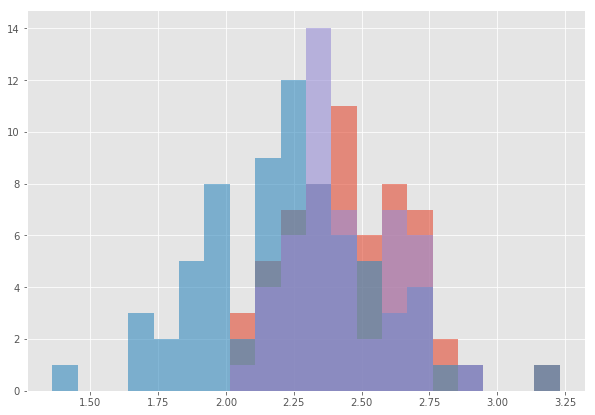

In [19]:
hist('Ash')

In [20]:
# outliers:  > 3 \sigma or < 3 \sigma
print(df['Ash'][df['Ash'] > df['Ash'].mean() + 3 * df['Ash'].std()])
print(df['Ash'][df['Ash'] < df['Ash'].mean() - 3 * df['Ash'].std()])

25     3.22
121    3.23
Name: Ash, dtype: float64
59    1.36
Name: Ash, dtype: float64
